In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import wilcoxon

data_prop = []
data_vis = []

with open("Main_part/data/exp2/12thApril/Denis_vis.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:  
            data_vis.append(datas) 

with open("Main_part/data/exp2/12thApril/Denis_imp.txt", "r") as my_file:
    for line in my_file:  
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas) 

data_prop = np.array(data_prop, dtype=float)
data_prop = data_prop[data_prop[:,0] < 0.35]

data_vis = np.array(data_vis, dtype=float)
data_vis = data_vis[data_vis[:,0] < 0.35]
print(data_vis[:,0].mean(),data_prop[:,0].mean())

0.30321875 0.31209677419354837


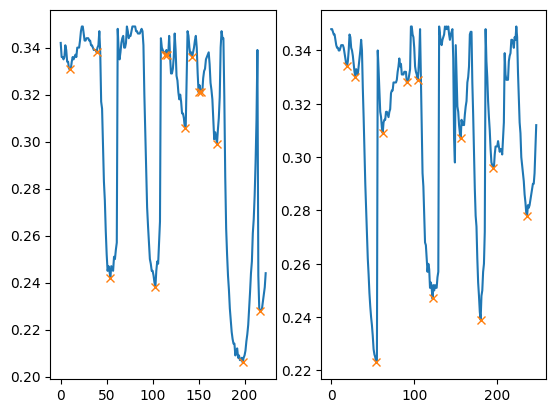

(11,) 0.2927272727272727 0.223
(13,) 0.2953846153846154 0.206


In [166]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(1,2)

x = data_prop[:,0]
peaks, _ = find_peaks(-x, width = 5,height=-0.35)
ax[1].plot(x)
ax[1].plot(peaks, x[peaks], "x")
prop_peaks = x[peaks]

x = data_vis[:,0]
peaks, _ = find_peaks(-x, width = 5,height=-0.35)
ax[0].plot(x)
ax[0].plot(peaks, x[peaks], "x")
vis_peaks = x[peaks]
plt.show()

print(prop_peaks.shape,prop_peaks.mean(),prop_peaks.min())
print(vis_peaks.shape,vis_peaks.mean(), vis_peaks.min())

In [216]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd   
import seaborn as sns
def process_file(path_to_file):
    data = []
    with open(path_to_file, "r") as my_file:
        for line in my_file:
            datas = line.split() 
            if float(datas[0]) > 0:  
                data.append(datas) 
    data = np.array(data, dtype=float)
    data = data[data[:,0] < 0.35]
    # print(data[:,0].mean())
    peaks, _ = find_peaks(-data[:,0], width = 3,height=-0.35)
    peak_values = data[:,0][peaks]
    number_of_crossings = peak_values[peak_values < 0.25].shape[0]

    return data[:,0].tolist(), data[:,0].mean(),peak_values.tolist(), number_of_crossings, peak_values.min(), peak_values.mean()

my_dir = "Main_part/data/exp2/12thApril/"
vis_data = []
prop_data = []
data = []
for file in os.listdir(my_dir):
    if file.endswith(".txt"):
        name_trial = file.split('.')[0].split("_")
        path_to_file = os.path.join(my_dir, file)
        dataset,mean,peak_values, crossings, peaks_min,peaks_mean = process_file(path_to_file)
        used_impeller = name_trial[1] == 'imp'
        peak_values.sort()
        values = peak_values[:5]
        # values = dataset
        # print(len(peak_values))
        values = [mean]
        if name_trial[1] == 'imp': 
            prop_data+= values
        else:  
            vis_data += values
        data.append([name_trial[0],crossings, peaks_min,peaks_mean, used_impeller])
        
df = pd.DataFrame(data=data, columns= ["name", "crossings", "peaks_min", "peaks_mean", "impeller_used"])

1) An ANOVA can only be conducted if there is no relationship between the subjects in each sample. 

2) This means that subjects in the first group cannot also be in the second group (e.g., independent samples/between groups).

3) The different groups/levels must have equal sample sizes.

4) An ANOVA can only be conducted if the dependent variable is normally distributed so that the middle scores are the most frequent and the extreme scores are the least frequent.
Population variances must be equal (i.e., homoscedastic). Homogeneity of variance means that the deviation of scores (measured by the range or standard deviation, for example) is similar between populations.

Results for minimum distances
F(1,265) = 5.666, pvalue=0.018

Results for time?

In [217]:
wilcoxon(vis_data,  prop_data)

WilcoxonResult(statistic=8.0, pvalue=0.048828125)

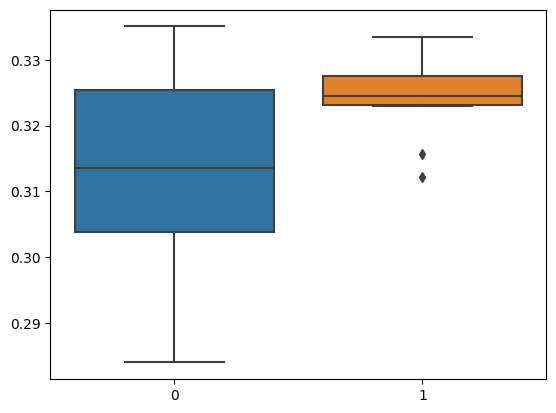

In [218]:
# ax = sns.boxplot([df[df['impeller_used'] == True]["peaks_mean"], df[df['impeller_used'] == False]["peaks_mean"]])
ax = sns.boxplot([vis_data, prop_data])
ax.set_xlabel("")
plt.show()

In [ ]:
crossings_imp = df[df['impeller_used'] == True]["crossings"]
crossings_vis = df[df['impeller_used'] == False]["crossings"]
ax = sns.boxplot([crossings_vis,crossings_imp])
plt.show()

k2, p = stats.normaltest(crossings_imp)
print(k2, p)
k2, p = stats.normaltest(crossings_vis)
print(k2, p)

wilcoxon(crossings_imp,  crossings_vis)

In [264]:
# experiment 1 code
def process_file(path_to_file):
    data = []
    with open(path_to_file, "r") as my_file:
        for i,line in enumerate(my_file):
            # print(i)
            if i < 2:
                continue
            datas = line.split() 
            data.append(datas) 
                        #     
    data = np.array(data, dtype=float)
    grad = np.diff(data[:,0],prepend = 0)
    requered_width = 1

    return data[grad > requered_width][:,1].tolist(), data[grad > requered_width][:,1].mean() 

my_dir = "Main_part/data/exp1_dist/protocol_relocations"

data_25 = []
data_35 = []
data = []
for file in os.listdir(my_dir):
    if file.endswith(".txt"):
        name_trial = file.split('.')[0].split("_")
        path_to_file = os.path.join(my_dir, file)
        data,means = process_file(path_to_file)
        val = data[:7]
        val = [means]
        if name_trial[1] == '35': data_35 += val
        else:  data_25 += val
        # data.append([name_trial[0],crossings, peaks_min,peaks_mean, used_impeller])
        
# df = pd.DataFrame(data=data, columns= ["name", "crossings", "peaks_min", "peaks_mean", "impeller_used"])

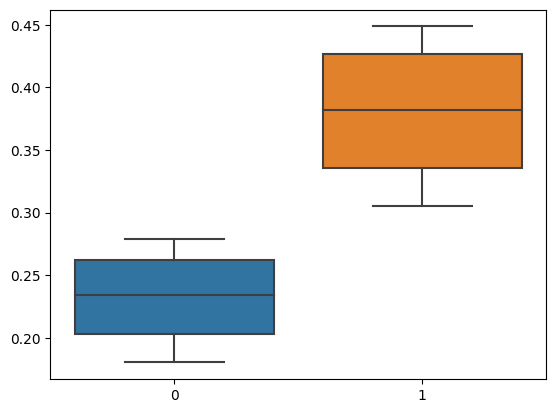

In [265]:
ax = sns.boxplot([data_25,data_35])
plt.show()

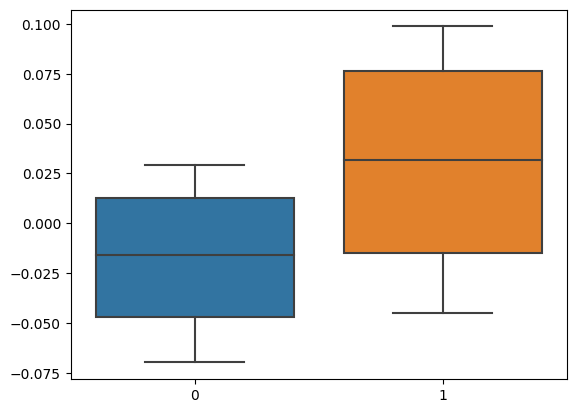

NormaltestResult(statistic=1.3542473228279466, pvalue=0.5080762920830055)
NormaltestResult(statistic=4.04775004910164, pvalue=0.13214241657589726)


C:\Users\vikt-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


WilcoxonResult(statistic=12.0, pvalue=0.130859375)

In [267]:
data_25_error = [val - 0.25 for val in data_25]
data_35_error = [val - 0.35 for val in data_35]
ax = sns.boxplot([data_25_error,data_35_error])
plt.show()
print(stats.normaltest(data_25_error))
print(stats.normaltest(data_35_error))
# print(len(data_25_error),len(data_35_error))
f_oneway(data_25_error,data_35_error)
wilcoxon(data_25_error,data_35_error)

In [ ]:
from scipy.spatial.transform import Rotation as R
import numpy as np

def open_cv_to_opengl(cv_matrix):
    cv_matrix[1:3,:] *= -1

poses = np.load("transforms.npy")
for pose in poses:
    open_cv_to_opengl(pose)


In [178]:


# print(stats.ttest_1samp(data_25_error, popmean=-0.000,alternative='two-sided'))
# print(stats.ttest_1samp(data_35_error, popmean=0.025,alternative='greater'))

NormaltestResult(statistic=21.389327325826937, pvalue=2.266556687365231e-05)
NormaltestResult(statistic=182.2144753301117, pvalue=2.7078800373255177e-40)
0.04035905944963014 -0.005944174757281553
0.06027560210059556 0.02466032608695655
412 368


WilcoxonResult(statistic=23200.5, pvalue=1.416135504766132e-07)

In [58]:
%history

import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import argrelextrema
data_prop = []
data_vis = []

with open("Main_part/data/exp2/12thApril/DenisDavl_imp.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:  
            data_vis.append(datas) 

with open("Main_part/data/exp2/12thApril/DenisDavl_vis.txt", "r") as my_file:
    for line in my_file:  
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas) 

data_prop = np.array(data_prop, dtype=float)
data_prop = data_prop[data_prop[:,0] < 0.35]

data_vis = np.array(data_vis, dtype=float)
data_vis = data_vis[data_vis[:,0] < 0.35]
print(data_vis[:,0].mean(),data_prop[:,0].mean())
from scipy.signal import find_peaks
fig, ax = plt.subplots(1,2)

x = data_prop[:,0]
peaks, _ = find_peaks(-x, width = 3,height=-0.35)
ax[1].plot(x)
ax[1].plot(peaks, x[peaks], "x")
prop_peaks = x[peaks]

x = data_vis[:,0]
peaks, _ = find_peaks

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

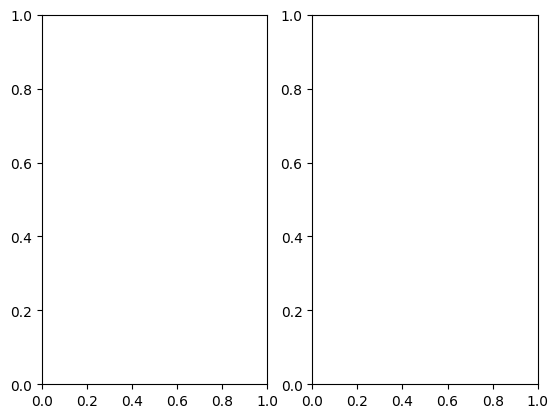

In [29]:
# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot([data_vis[:,0],data_prop[:,0]])
# plt.show()
data_all_vis = []
data_all_prop = []
for key,item in data_25.items():
    data_all_vis.append(item)

for key,item in data_35.items():
    data_all_prop.append(item)

fig1, ax = plt.subplots(1,2)
# ax.set_title('Basic Plot')
ax[0].boxplot(np.array(data_all_vis))
# ax[1].boxplot([data_vis[:,0],data_prop[:,0]])
plt.show()

In [30]:
np.array(data_all_vis).shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

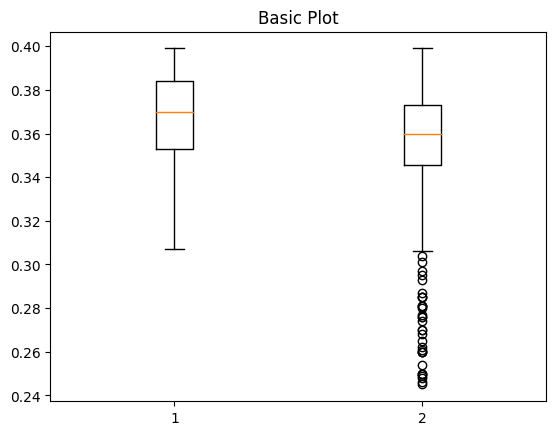

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([data_vis[:,0],data_prop[:,0]])
plt.show()

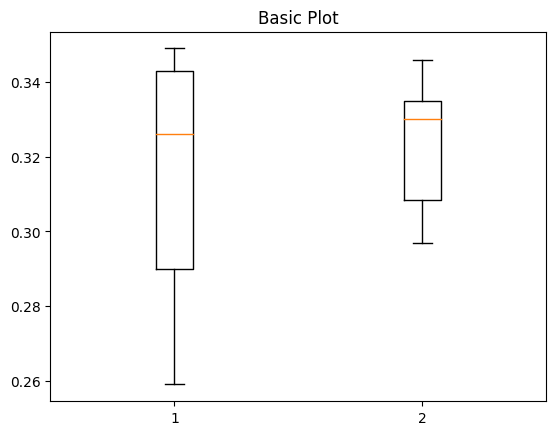

In [37]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([vis_peaks,prop_peaks])
plt.show()

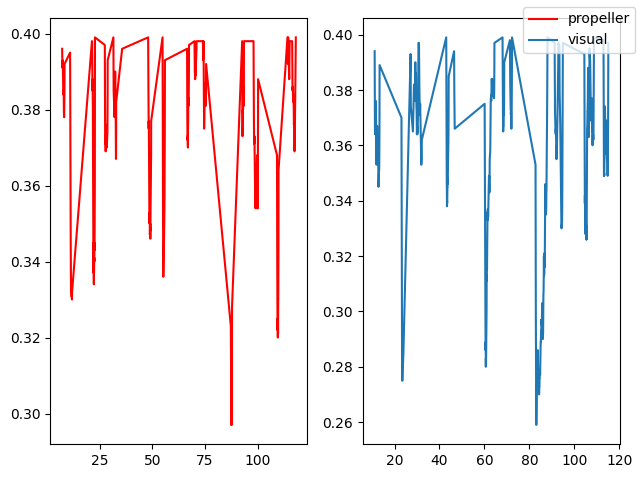

In [38]:
fig, ax = plt.subplots(1,2)
ax[0].plot(data_prop[:,2],data_prop[:,0],'r', label='propeller')
ax[1].plot(data_vis[:,2],data_vis[:,0], label='visual')
fig.tight_layout()
fig.legend()
plt.show()

0.4816619981325865
0.246
51.61


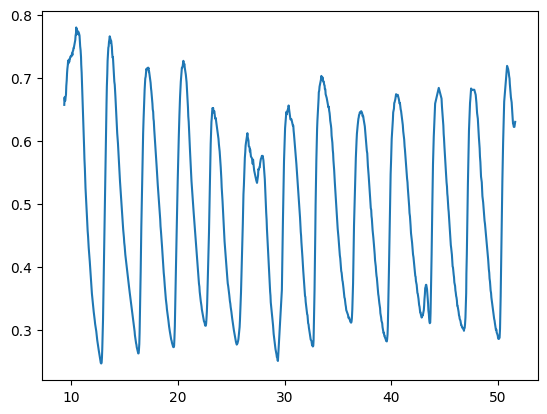

In [98]:
import numpy as np
data_prop = []
with open("data/reaction_time/exp1_reaction_Denis_Grankin.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas)

print(np.array(data_prop, dtype=float).mean(axis = 0)[0])
print(np.array(data_prop, dtype=float).min(axis = 0)[0])
print(np.array(data_prop, dtype=float).max(axis = 0)[2])
data_prop =  np.array(data_prop, dtype=float)
fig, ax = plt.subplots()
ax.plot(data_prop[:,2],data_prop[:,0])
plt.show()

(14, 2)


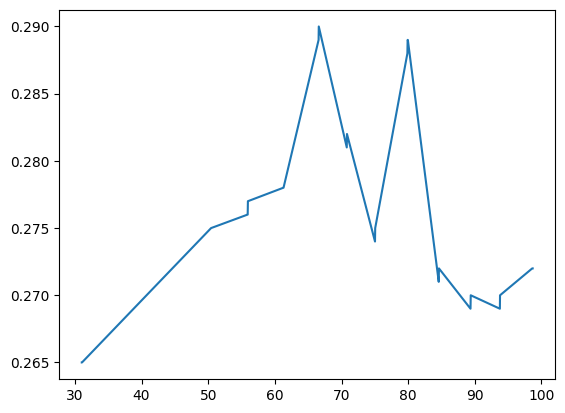

In [102]:

data = []
with open("data/distance_measurement/exp1_distance_Denis_Grankin_25.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:
            data.append(datas)

data =  np.array(data, dtype=float)


threshold = 1
diff = np.empty(data.shape)

diff[0] = np.inf  # always retain the 1st element
diff[1:] = np.diff(data)

mask = diff > threshold

new_arr = data[mask]

mask = data[:,1] > 0.35
far = data[mask]
print(far.shape)
min_dt_dist = 1

close = data[~mask]
fig, ax = plt.subplots()
ax.plot(close[:,0],close[:,1])
plt.show()
# print(argrelextrema(data, np.less))

In [ ]:
import numpy as np
data_prop = []
with open("Main_part/data/exp1_dist/protocol_relocations/exp1_distance_honest_filedVictordd.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        # if float(datas[0]) > 0:
        data_prop.append(datas)

# Main_part\data\exp1_dist\protocol_relocations\exp1_distance_honest_filedVictordd.txt
print(data_prop)
# print(np.array(data, dtype=float).mean(axis = 0)[0])
# print(np.array(data, dtype=float).min(axis = 0)[0])
# print(np.array(data, dtype=float).max(axis = 0)[2])